In [1]:
%matplotlib notebook
from imp import reload  # Python 3.0 - 3.3
       
from matplotlib import pyplot as plt
from matplotlib import rc
# rc('text', usetex=True)

import os
import numpy as np
from astropy.table import Table

import pycoco as pcc

<IPython.core.display.Javascript object>


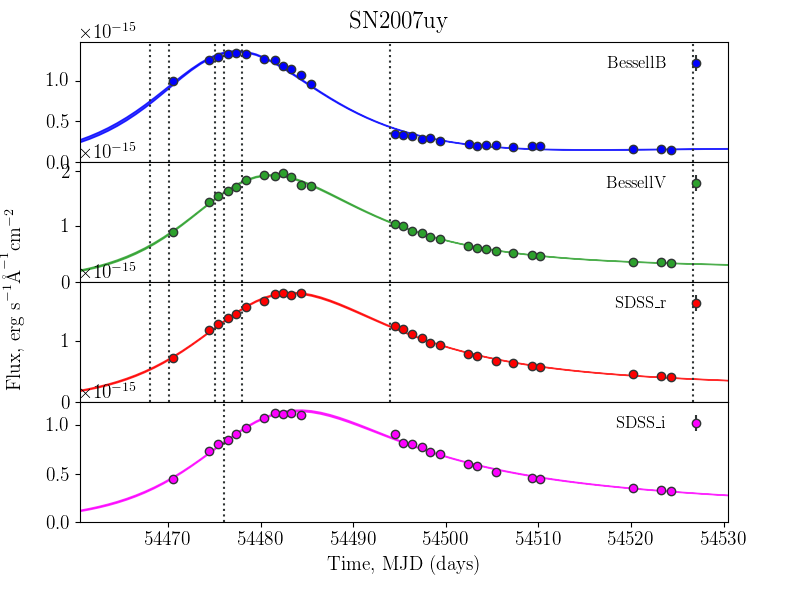

In [2]:
snname = "SN2007uy"

sn = pcc.classes.SNClass(snname)
sn.load_phot( path = os.path.join(pcc.defaults._default_data_dir_path, "lc/"+ snname + ".dat"))
sn.load_list(os.path.join(pcc.defaults._default_list_dir_path, snname + ".list"))

sn.load_spec()
sn.get_lcfit(os.path.join(pcc.defaults._default_recon_dir_path, snname + ".dat"))
sn.check_overlaps()

sn.plot_lc(xextent=60, showsnname=True)

<IPython.core.display.Javascript object>


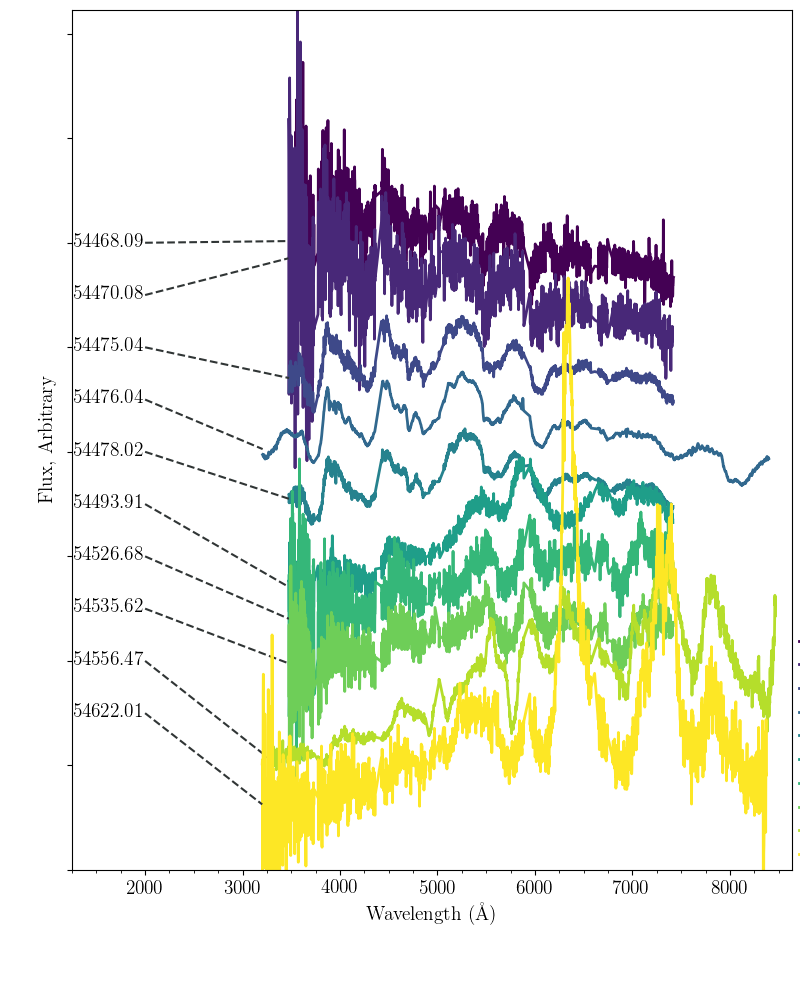

In [3]:
sn.plot_spec()

In [4]:
for j in zip(sn.spec, [sn.spec[i].mjd_obs for i in sn.spec]):
    print(j)

('2007uy_-13.01.txt', 54468.089999999997)
('2007uy_-11.02.txt', 54470.080000000002)
('2007uy_-6.06.txt', 54475.040000000001)
('2007uy_-5.06.txt', 54476.040000000001)
('2007uy_-3.08.txt', 54478.019999999997)
('2007uy_12.81.txt', 54493.910000000003)
('2007uy_45.58.txt', 54526.68)
('2007uy_54.52.txt', 54535.620000000003)
('2007uy_75.37.txt', 54556.470000000001)
('2007uy_140.91.txt', 54622.010000000002)


In [5]:
spec = sn.spec["2007uy_-5.06.txt"]

In [6]:
# spec.__dict__

In [7]:
sn.phot.data_filters

OrderedDict([('BessellB', <pycoco.classes.FilterClass at 0x111b47320>),
             ('BessellV', <pycoco.classes.FilterClass at 0x111b606a0>),
             ('SDSS_r', <pycoco.classes.FilterClass at 0x111c605f8>),
             ('SDSS_i', <pycoco.classes.FilterClass at 0x111ba42e8>)])

In [8]:
filter_name = "BessellB"
S = sn.spec["2007uy_-5.06.txt"]

for i, filter_name in enumerate(sn.phot.data_filters):
    flux = pcc.kcorr.calc_spectrum_filter_flux(filter_object=sn.phot.data_filters[filter_name], spectrum_object=S)
    print(flux)
    if i == 0:
        S.specphot = Table(names = ("lambda_effective", "flux", "filter"), dtype=('f4', 'f4', 'S'))

    S.specphot.add_row((sn.phot.data_filters[filter_name].lambda_effective, flux, filter_name))
    

Filter_area =  958.905389226
Integrated flux =  1.25909260411e-14
1.31305196348e-17
Filter_area =  893.09534922
Integrated flux =  1.3248860846e-14
1.48347663635e-17
Filter_area =  1108.16294901
Integrated flux =  1.31211171171e-14
1.18404221408e-17
Filter_area =  1097.45661135
Integrated flux =  8.54903671189e-15
7.78986305562e-18


<IPython.core.display.Javascript object>


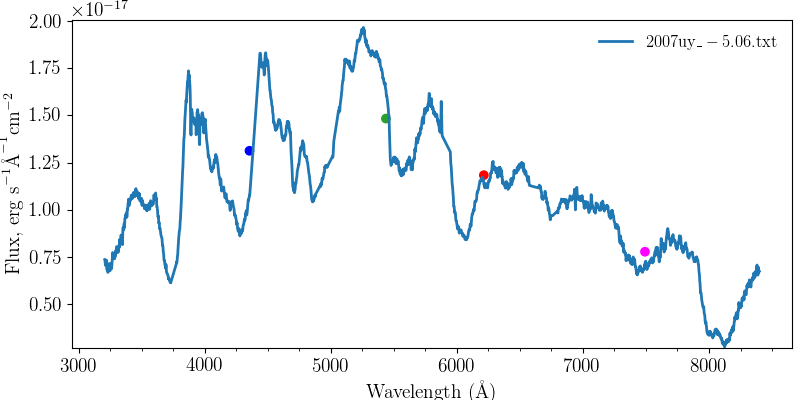

In [9]:
fig = sn.spec["2007uy_-5.06.txt"].plot(return_figure = True)

ax = fig.add_subplot(111)

ax.scatter(S.specphot["lambda_effective"], S.specphot["flux"], c = [sn.phot.data_filters[f]._plot_colour for f in sn.phot.data_filters])

In [10]:
S.specphot

lambda_effective,flux,filter
float32,float32,bytes32
4354.41,1.31305e-17,BessellB
5436.87,1.48348e-17,BessellV
6213.67,1.18404e-17,SDSS_r
7491.96,7.78986e-18,SDSS_i


# Black Body
___

In [11]:
from astropy.modeling import blackbody as bb
from astropy.table import Table, Column, Row
from astropy import units as u

In [12]:
bb.blackbody_lambda

<function astropy.modeling.blackbody.blackbody_lambda>

<IPython.core.display.Javascript object>


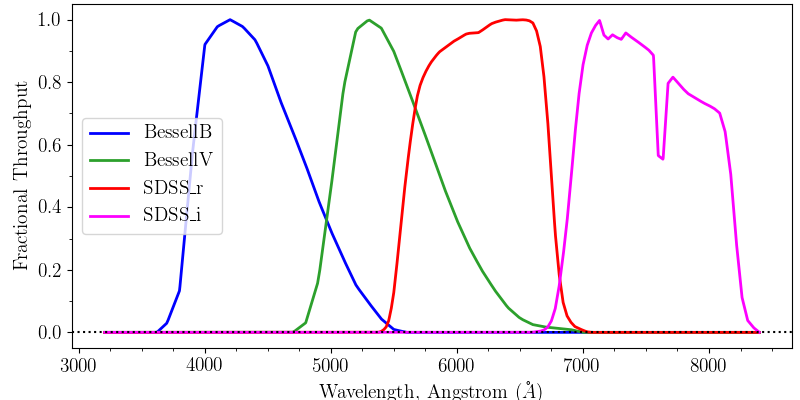

In [13]:
sn.plot_filters()

In [14]:
filter_name = "SDSS_i"
new_max_wavelength = 9500
wav_interval = 1.0

orig_wavelength = sn.phot.data_filters[filter_name].wavelength
extend_wavelength = np.append(np.arange(orig_wavelength[-1]+1.0, new_max_wavelength, wav_interval), new_max_wavelength)

In [15]:
bb_flux = bb.blackbody_lambda(np.array(orig_wavelength)*u.AA, temperature=10000*u.Kelvin)

dt_blackbody = Table([orig_wavelength, bb_flux], names=("wavelength", "flux"))

In [16]:
bb_S = pcc.classes.SpectrumClass()

In [17]:
bb_S.load_table(dt_blackbody)

<IPython.core.display.Javascript object>


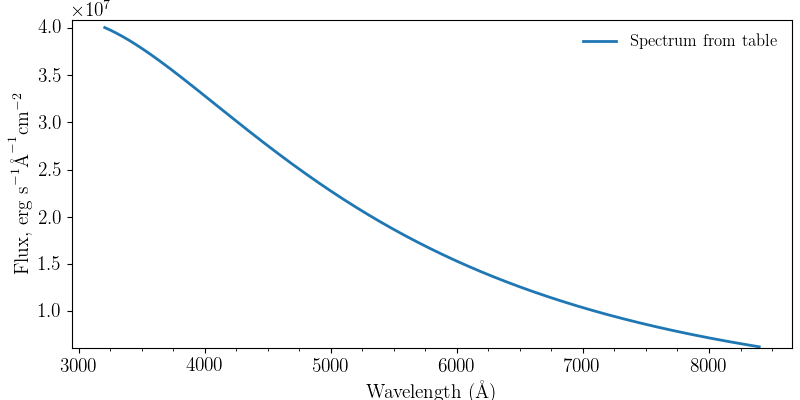

In [18]:
bb_S.plot()

In [19]:
# type(sn.phot.data_filters)
bb_S.check_overlaps(sn.phot.data_filters, verbose = True)

0 <pycoco.classes.FilterClass object at 0x111b47320>
True
1 <pycoco.classes.FilterClass object at 0x111b606a0>
True
2 <pycoco.classes.FilterClass object at 0x111c605f8>
True
3 <pycoco.classes.FilterClass object at 0x111ba42e8>
True


In [20]:
bb_S._overlapping_filter_list

array(['BessellB', 'BessellV', 'SDSS_r', 'SDSS_i'],
      dtype='<U8')

In [21]:
bb_S.get_specphot(sn.phot.data_filters, verbose = True)

28514915.9343
18762067.6354
14371586.0993
8717790.12859


/Users/berto/Code/verbose-enigma/pycoco/classes.py:594: UserWarning: no overlapping filters
  warnings.warn("no overlapping filters")


In [22]:
bb_S.specphot

lambda_effective,flux,filter
float32,float32,bytes32
4354.41,2.85149e+07,BessellB
5436.87,1.87621e+07,BessellV
6213.67,1.43716e+07,SDSS_r
7491.96,8.71779e+06,SDSS_i


<IPython.core.display.Javascript object>


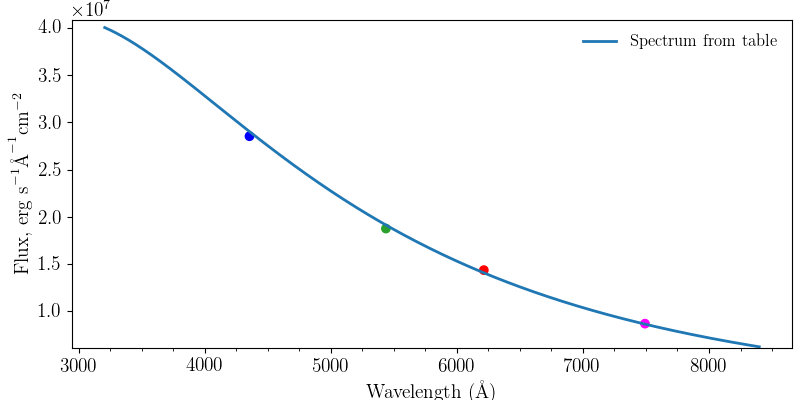

In [23]:
fig = bb_S.plot(return_figure=True)

ax1 = fig.add_subplot(111)
ax1.scatter(bb_S.specphot["lambda_effective"], bb_S.specphot["flux"], label="Specphot",
            c = [pcc.colours.hex[i] for i in sn.phot.data_filters])


In [24]:
red_bb_S = pcc.classes.SpectrumClass()
red_bb_S.load_table(dt_blackbody)
red_bb_S.check_overlaps(sn.phot.data_filters)

red_bb_S.flux = pcc.extinction.unred(red_bb_S.wavelength, red_bb_S.flux, EBV=-0.2)

red_bb_S.get_specphot(sn.phot.data_filters, verbose = True)

13322265.6343
10522854.559
8670726.049
5914124.89592


/Users/berto/Code/verbose-enigma/pycoco/classes.py:594: UserWarning: no overlapping filters
  warnings.warn("no overlapping filters")


<IPython.core.display.Javascript object>


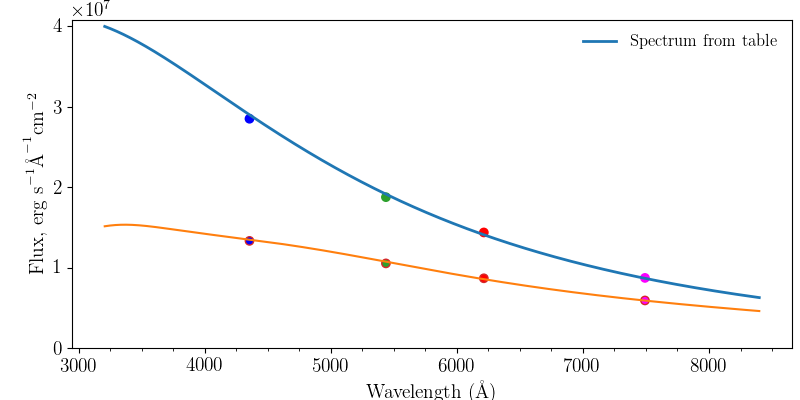

(0.0, 40795331.11614605)

In [25]:
fig = bb_S.plot(return_figure=True)

ax1 = fig.add_subplot(111)
ax1.scatter(bb_S.specphot["lambda_effective"], bb_S.specphot["flux"], label="Specphot",
            c = [pcc.colours.hex[i] for i in sn.phot.data_filters])

ax1.plot(red_bb_S.wavelength, red_bb_S.flux, color = "C1")
ax1.scatter(red_bb_S.specphot["lambda_effective"], red_bb_S.specphot["flux"], label="Specphot",
            c = [pcc.colours.hex[i] for i in sn.phot.data_filters], edgecolors="C3")

ax1.set_ylim(0.0, ax1.get_ylim()[1])

In [26]:
# fig = plt.figure()

# ax1 = plt.subplot(111)
# ax1.plot(red_bb_S.wavelength, red_bb_S.flux)

In [27]:
red_bb_S.specphot

lambda_effective,flux,filter
float32,float32,bytes32
4354.41,1.33223e+07,BessellB
5436.87,1.05229e+07,BessellV
6213.67,8.67073e+06,SDSS_r
7491.96,5.91412e+06,SDSS_i


In [28]:
bb_S.specphot

lambda_effective,flux,filter
float32,float32,bytes32
4354.41,2.85149e+07,BessellB
5436.87,1.87621e+07,BessellV
6213.67,1.43716e+07,SDSS_r
7491.96,8.71779e+06,SDSS_i


In [29]:
flux_scale = red_bb_S.specphot["flux"][np.where(red_bb_S.specphot["filter"] == "SDSS_i")] / S.specphot["flux"][np.where(S.specphot["filter"] == "SDSS_i")]

In [30]:
red_bb_S.data["flux"] = red_bb_S.data["flux"] / flux_scale
red_bb_S.flux = red_bb_S.flux / flux_scale

In [31]:
red_bb_S.get_specphot(sn.phot.data_filters, verbose = True)

1.75475875231e-17
1.38603084817e-17
1.1420754428e-17
7.78986300699e-18


/Users/berto/Code/verbose-enigma/pycoco/classes.py:594: UserWarning: no overlapping filters
  warnings.warn("no overlapping filters")


<IPython.core.display.Javascript object>


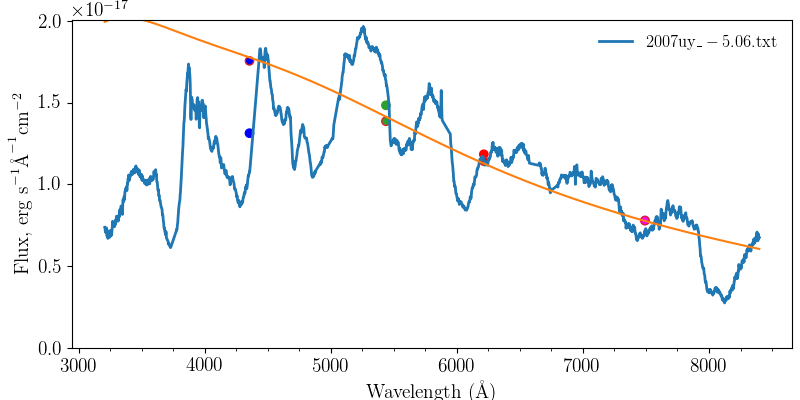

(0.0, 2.00481e-17)

In [32]:
fig = sn.spec["2007uy_-5.06.txt"].plot(return_figure = True)

ax1 = fig.add_subplot(111)

ax1.scatter(S.specphot["lambda_effective"], S.specphot["flux"], c = [sn.phot.data_filters[f]._plot_colour for f in sn.phot.data_filters])

ax1.plot(red_bb_S.wavelength, red_bb_S.flux, color = "C1")
ax1.scatter(red_bb_S.specphot["lambda_effective"], red_bb_S.specphot["flux"], label="Specphot",
            c = [pcc.colours.hex[i] for i in sn.phot.data_filters], edgecolors="C3")

ax1.set_ylim(0.0, ax1.get_ylim()[1])

In [33]:
# specphot
# specphot_bb

In [34]:
from lmfit import minimize, Parameters, fit_report

params = Parameters()
params.add("T", value=10000) ## BB temp
params.add("flux_scale", value=1e23) ## Flux Scaling
params.add("EBV", value=0.0) ## Extinction

# specphot, T, EBV, flux_scale, filters
def bb_min(params, specphot, filters, wavelength, verbose=False):
    
    T = params["T"]
    flux_scale = params["flux_scale"]
    EBV = params["EBV"]
    
    bb_flux = bb.blackbody_lambda(np.array(wavelength)*u.AA, temperature=T*u.Kelvin)

    bb_spec = pcc.classes.SpectrumClass()
    bb_spec.load_table(Table([wavelength, bb_flux], names=("wavelength", "flux")))
  
    bb_spec.flux = pcc.extinction.unred(bb_spec.wavelength, bb_spec.flux, EBV=EBV)

    bb_spec.data["flux"] = bb_spec.data["flux"] / flux_scale
    bb_spec.flux = bb_spec.flux / flux_scale

    bb_spec.get_specphot(filters, verbose = True)

    residual = specphot["flux"] - bb_spec.specphot["flux"]

#     return np.sum((residual)**2)
    return residual

def bb_min_fun(params, specphot, filters, wavelength, verbose=False):
    
    T = params["T"]
    flux_scale = params["flux_scale"]
    EBV = params["EBV"]
    
    bb_flux = bb.blackbody_lambda(np.array(wavelength)*u.AA, temperature=T*u.Kelvin)

    bb_spec = pcc.classes.SpectrumClass()
    bb_spec.load_table(Table([wavelength, bb_flux], names=("wavelength", "flux")))
    
    bb_spec.flux = pcc.extinction.unred(bb_spec.wavelength, bb_spec.flux, EBV=EBV)

    bb_spec.data["flux"] = bb_spec.data["flux"] / flux_scale
    bb_spec.flux = bb_spec.flux / flux_scale

    bb_spec.get_specphot(filters, verbose = True)

    return bb_spec

In [35]:
out = minimize(bb_min, params, args=(S.specphot, sn.phot.data_filters, orig_wavelength), kws = ({"verbose": False}))

0 <pycoco.classes.FilterClass object at 0x111b47320>
True
1 <pycoco.classes.FilterClass object at 0x111b606a0>
True
2 <pycoco.classes.FilterClass object at 0x111c605f8>
True
3 <pycoco.classes.FilterClass object at 0x111ba42e8>
True
2.85149159343e-16
1.87620676354e-16
1.43715860993e-16
8.71779012859e-17


/Users/berto/Code/verbose-enigma/pycoco/classes.py:594: UserWarning: no overlapping filters
  warnings.warn("no overlapping filters")


0 <pycoco.classes.FilterClass object at 0x111b47320>
True
1 <pycoco.classes.FilterClass object at 0x111b606a0>
True
2 <pycoco.classes.FilterClass object at 0x111c605f8>
True
3 <pycoco.classes.FilterClass object at 0x111ba42e8>
True
2.85149159343e-16
1.87620676354e-16
1.43715860993e-16
8.71779012859e-17
0 <pycoco.classes.FilterClass object at 0x111b47320>
True
1 <pycoco.classes.FilterClass object at 0x111b606a0>
True
2 <pycoco.classes.FilterClass object at 0x111c605f8>
True
3 <pycoco.classes.FilterClass object at 0x111ba42e8>
True
2.85149159343e-16
1.87620676354e-16
1.43715860993e-16
8.71779012859e-17
0 <pycoco.classes.FilterClass object at 0x111b47320>
True
1 <pycoco.classes.FilterClass object at 0x111b606a0>
True
2 <pycoco.classes.FilterClass object at 0x111c605f8>
True
3 <pycoco.classes.FilterClass object at 0x111ba42e8>
True
2.85488089102e-16
1.87805210296e-16
1.43844837884e-16
8.72460062646e-17
0 <pycoco.classes.FilterClass object at 0x111b47320>
True
1 <pycoco.classes.FilterClass 

0 <pycoco.classes.FilterClass object at 0x111b47320>
True
1 <pycoco.classes.FilterClass object at 0x111b606a0>
True
2 <pycoco.classes.FilterClass object at 0x111c605f8>
True
3 <pycoco.classes.FilterClass object at 0x111ba42e8>
True
1.39048915195e-17
1.32135142414e-17
1.19623066388e-17
8.8705985194e-18
0 <pycoco.classes.FilterClass object at 0x111b47320>
True
1 <pycoco.classes.FilterClass object at 0x111b606a0>
True
2 <pycoco.classes.FilterClass object at 0x111c605f8>
True
3 <pycoco.classes.FilterClass object at 0x111ba42e8>
True
1.38678567486e-17
1.31842771787e-17
1.19382148809e-17
8.85518224718e-18
0 <pycoco.classes.FilterClass object at 0x111b47320>
True
1 <pycoco.classes.FilterClass object at 0x111b606a0>
True
2 <pycoco.classes.FilterClass object at 0x111c605f8>
True
3 <pycoco.classes.FilterClass object at 0x111ba42e8>
True
1.38784378492e-17
1.3193035756e-17
1.19456702956e-17
8.86014222423e-18
0 <pycoco.classes.FilterClass object at 0x111b47320>
True
1 <pycoco.classes.FilterClass ob

0 <pycoco.classes.FilterClass object at 0x111b47320>
True
1 <pycoco.classes.FilterClass object at 0x111b606a0>
True
2 <pycoco.classes.FilterClass object at 0x111c605f8>
True
3 <pycoco.classes.FilterClass object at 0x111ba42e8>
True
1.38908920061e-17
1.32032632815e-17
1.19430721776e-17
8.86679165822e-18
0 <pycoco.classes.FilterClass object at 0x111b47320>
True
1 <pycoco.classes.FilterClass object at 0x111b606a0>
True
2 <pycoco.classes.FilterClass object at 0x111c605f8>
True
3 <pycoco.classes.FilterClass object at 0x111ba42e8>
True
1.39009756404e-17
1.32116605881e-17
1.19502346316e-17
8.87158884607e-18
0 <pycoco.classes.FilterClass object at 0x111b47320>
True
1 <pycoco.classes.FilterClass object at 0x111b606a0>
True
2 <pycoco.classes.FilterClass object at 0x111c605f8>
True
3 <pycoco.classes.FilterClass object at 0x111ba42e8>
True
1.38957572702e-17
1.32077714723e-17
1.19472924931e-17
8.8697187545e-18
0 <pycoco.classes.FilterClass object at 0x111b47320>
True
1 <pycoco.classes.FilterClass o

In [36]:
print(fit_report(out))

paramlist = np.array([out.params[key].value for key in out.params.keys()])

[[Fit Statistics]]
    # function evals   = 67
    # data points      = 4
    # variables        = 3
    chi-square         = 0.000
    reduced chi-square = 0.000
    Akaike info crit   = -325.182
    Bayesian info crit = -327.023
[[Variables]]
    T:            4972.76564 +/- 2.18e+04 (438.02%) (init= 10000)
    flux_scale:   2.1437e+23 +/- 1.06e+24 (494.19%) (init= 1e+23)
    EBV:          0.29279807 +/- 6.371343 (2176.02%) (init= 0)
[[Correlations]] (unreported correlations are <  0.100)
    C(T, EBV)                    = -1.000 
    C(T, flux_scale)             =  0.997 
    C(flux_scale, EBV)           = -0.995 


In [37]:
# best_bb = bb_min_fun(out.params, S.specphot, sn.phot.data_filters, S.wavelength)
best_bb = bb_min_fun(out.params, S.specphot, sn.phot.data_filters, Column(np.arange(2000, 10000)*u.Angstrom))

0 <pycoco.classes.FilterClass object at 0x111b47320>
True
1 <pycoco.classes.FilterClass object at 0x111b606a0>
True
2 <pycoco.classes.FilterClass object at 0x111c605f8>
True
3 <pycoco.classes.FilterClass object at 0x111ba42e8>
True
1.3895728314e-17
1.3207792566e-17
1.19472054478e-17
8.87184652152e-18


/Users/berto/Code/verbose-enigma/pycoco/classes.py:594: UserWarning: no overlapping filters
  warnings.warn("no overlapping filters")


<IPython.core.display.Javascript object>


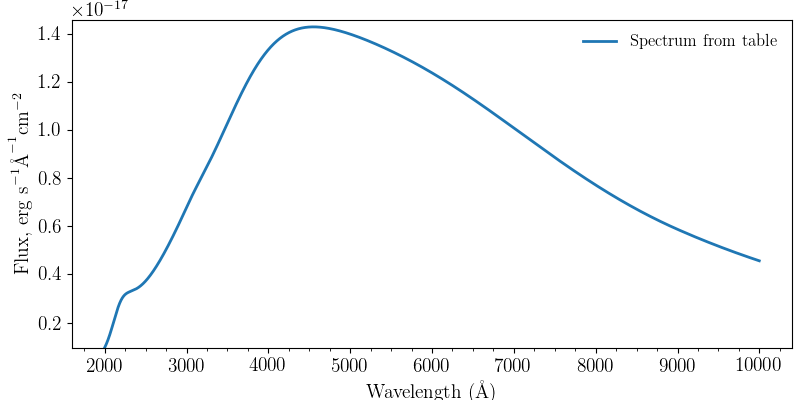

In [38]:
best_bb.plot()

In [ ]:
wavelength = np.arange(1000, 10000)

T = params["T"]
flux_scale = params["flux_scale"]
EBV = params["EBV"]

bb_flux = bb.blackbody_lambda(np.array(wavelength)*u.AA, temperature=T*u.Kelvin)

bb_spec = pcc.classes.SpectrumClass()
bb_spec.load_table(Table([wavelength, bb_flux], names=("wavelength", "flux")))

bb_spec.flux = pcc.extinction.unred(bb_spec.wavelength, bb_spec.flux, EBV=EBV, verbose = True)

bb_spec.data["flux"] = bb_spec.data["flux"] / flux_scale
bb_spec.flux = bb_spec.flux / flux_scale

bb_spec.get_specphot(filters, verbose = True)

In [ ]:
# len(wavelength)
# len(bb_spec.wavelength)
len(bb_spec.flux)


In [ ]:
pcc.extinction.unred(bb_spec.wavelength, bb_spec.flux, EBV=EBV, verbose = True)

In [ ]:
best_bb.plot()